In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: build: File exists
-- The C compiler identification is AppleClang 11.0.3.11030032
-- The CXX compiler identification is AppleClang 11.0.3.11030032
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/local/bin/python3 (found version "3.7.7") 
-- Found PythonLibs: /usr/local/opt/python/Frameworks/Python.framework/Versions/3.7/lib/libpython3.7m.dylib
-- pybind11 v2.5

In [1]:
import math 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/Users/mariano.benzo/Facultad/Metodos/TP3/metnum-tp3/notebooks
Python 2.7.16


## K-Fold Cross-Validation

In [3]:
def splitTrainSet(x, y, K, i):
    size = int(x.shape[0] * 1/K)
    
    x_train1 = x[:i * size]
    x_train2 = x[(i + 1) * size:]
    x_train = np.concatenate((x_train1, x_train2))
    x_test = x[i * size:(i + 1) * size]
    
    y_train1 = y[:i * size]
    y_train2 = y[(i + 1) * size:]
    y_train = np.concatenate((y_train1, y_train2))
    y_test = y[i * size:(i + 1) * size]
    
    return x_train, y_train, x_test, y_test

In [4]:
from sklearn.linear_model import LinearRegression

def linearRegressionKFold(x, y, K):
    
    RMSError = []
    RMSLError = []
    
    for i in range(0, K):
        x_train, y_train, x_test, y_test = splitTrainSet(x, y, K, i)
                
        linear_regressor = metnum.LinearRegression()
        #linear_regressor = LinearRegression()

        linear_regressor.fit(x_train, y_train)
        
        y_pred = linear_regressor.predict(x_test)
        
        e = RMSE(y_test, y_pred)
        le = RMSLE(y_test, y_pred)

        RMSError.append(e)
        RMSLError.append(le)

    RMSError = np.mean(RMSError)
    RMSLError = np.mean(RMSLError)

    return RMSError, RMSLError

## RMSE & RMSLE

In [5]:
def RMSE(y_test, y_pred):
    n = len(y_test)
    return math.sqrt(sum([(y_test[i] - y_pred[i])**2 for i in range(0, n)]) / n)

In [6]:
def RMSLE(y_test, y_pred):
    n = len(y_test)
    return math.sqrt(sum([(math.log(y_test[i] + 1) - (math.log(y_pred[i] + 1)))**2 for i in range(0, n)]) / n)

## Experimentacion

In [7]:
df_train = pd.read_csv('../data/train.csv')
df_train = df_train[df_train['ciudad']=='Mérida'].dropna()

df_test = pd.read_csv('../data/test.csv')
df_test = df_test[df_test['ciudad']=='Mérida'].dropna()

In [8]:
x = df_train[['metroscubiertos', 'banos']].values
y = df_train['precio'].values
x = x.reshape(len(x), x.shape[1])
y = y.reshape(len(y), 1)

In [9]:
K = 5
linearRegressionKFold(x, y, K)

(646586.3086143383, 0.37157273598356816)

In [10]:
#linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()
linear_regressor.fit(x,y)

x = df_test[['metroscubiertos', 'banos']].values
x = x.reshape(len(x), x.shape[1])
df_test['prediction'] = linear_regressor.predict(x)

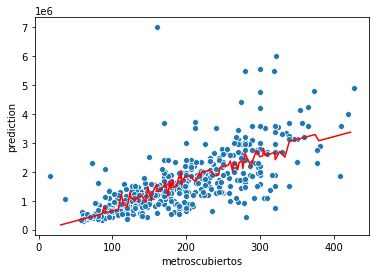

In [11]:
sns.scatterplot(data=df_train, x='metroscubiertos', y='precio')
sns.lineplot(data=df_test, x='metroscubiertos', y='prediction', color='red')

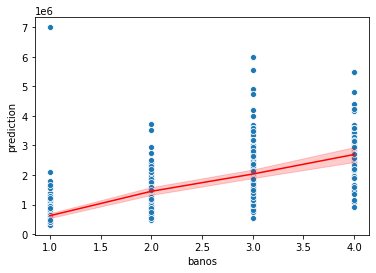

In [12]:
sns.scatterplot(data=df_train, x='banos', y='precio')
sns.lineplot(data=df_test, x='banos', y='prediction', color='red')

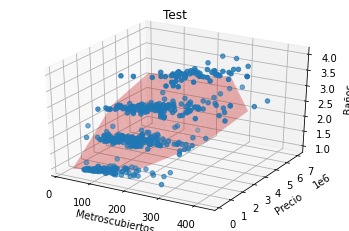

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = df_test[['metroscubiertos', 'banos']].values
x = x.reshape(len(x), x.shape[1])
df_test['prediction'] = linear_regressor.predict(x)

# Data for a three-dimensional line
zline = df_test['banos'].values
xline = df_test['metroscubiertos'].values
yline = df_test['prediction'].values
ax.plot_trisurf(xline, yline, zline, color='red', alpha=0.3)


# Data for three-dimensional scattered points
zdata = df_train['banos'].values
xdata = df_train['metroscubiertos'].values
ydata = df_train['precio'].values
ax.scatter3D(xdata, ydata, zdata)

ax.set_title('Test');
ax.set_xlabel('Metroscubiertos')
ax.set_ylabel('Precio')
ax.set_zlabel('Baños');
#ax.view_init(60, 0)
